# P7: Predictive ML Project — Simple Linear Regression  
**Author:** Abdellah Boudlal
**Date:** 2025-10-04  

**Project Repository:** *(https://github.com/Aboudlal/datafun-07-ml)*

---

This notebook implements the required parts:

- **Part 1** — Chart a straight line (Celsius vs Fahrenheit)  
- **Part 2** — Predict NYC January average high temperature using SciPy `linregress`  
- **Part 3** — Predict NYC January average high temperature using scikit-learn (train/test split)  
- **Part 4** — Insights comparing both approaches  

> Tip: Run **Kernel → Restart & Run All** before committing to GitHub.

In [ ]:
# Imports (keep all imports together at the top)
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization (project allows seaborn; tool rule here: we demonstrate matplotlib only)
import matplotlib.pyplot as plt

# Stats & ML
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 — Chart a Straight Line

We revisit the line equation **y = m x + b** using the Celsius–Fahrenheit conversion:
- **m (slope)** = 9/5  
- **b (intercept)** = 32

In [23]:
# Create Celsius values and compute Fahrenheit using y = m x + b
c_values = np.arange(-20, 51, 5)  # -20°C to 50°C step 5
m = 9/5
b = 32
f_values = m * c_values + b

df_cf = pd.DataFrame({'Celsius': c_values, 'Fahrenheit': f_values})
df_cf.head()


,Celsius,Fahrenheit
0,-20,-4.00
1,-15,5.00
2,-10,14.00
3,-5,23.00
4,0,32.00


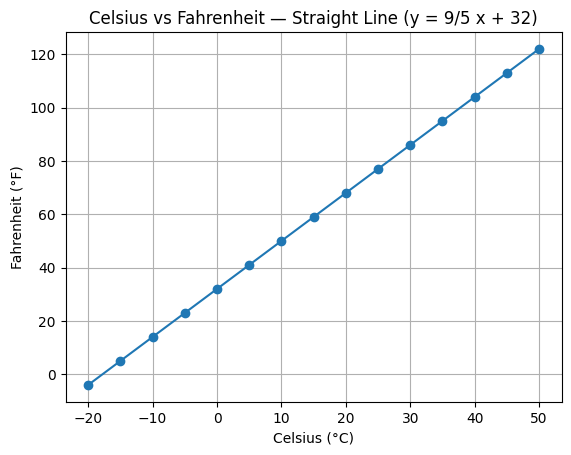

In [24]:
# Plot the straight line (Celsius vs Fahrenheit)
plt.figure()
plt.plot(df_cf['Celsius'], df_cf['Fahrenheit'], marker='o')
plt.title('Celsius vs Fahrenheit — Straight Line (y = 9/5 x + 32)')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.grid(True)
plt.show()

## Part 2: Predict Avg High Temp in NYC in January using scipy

#### Section 1 - Data Acquisition
#### Loading the Average High Temperature in NYC in Jan data into a DataFrame

In [25]:
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

#### Section 2 - Data Inspection

In [26]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


#### Section 3 - Data Cleaning

In [27]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


#### Truncate the last two digits of the date column

In [28]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


#### Section 4 - Descriptive Statistics
##### Calculating Basic Descriptive Statistics for the Dataset

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


#### Section 5 - Build the Model

In [30]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [31]:
linear_regression.intercept

np.float64(8.694993233674289)

#### Section 6 - Predict
#### Forecasting Future January Average High Temperatures

In [32]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

#### Section 7 - Visualizations
#### Plotting the Average High Temperatures and a Regression Line

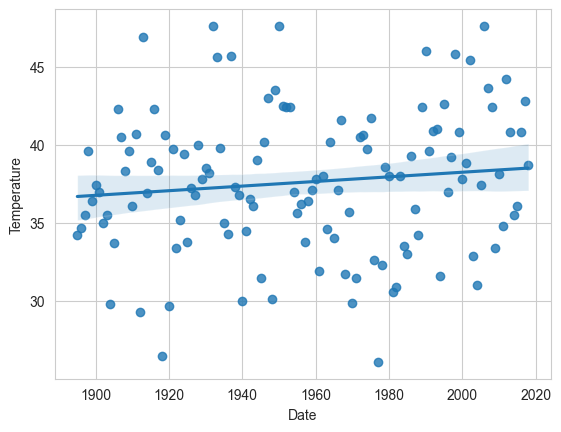

In [33]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)